In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv(r'E:\VIL Confidential Information Dataset\frontend.csv')

In [16]:
data

,Internet Usage,SMS Usage,Voice Usage,ARPU,Recharge,Age,Location,Gender,Churn,Customer Segment
0,143,143,125,143,125,>58,Kolkata,M,85,0
1,857,143,375,429,375,39-43,Kolkata,F,76,0
2,714,143,1000,857,750,39-43,Kerala,M,22,0
3,429,0,375,1000,1000,39-43,Kerala,M,71,0
4,857,143,1000,1000,1000,>58,Kerala,M,35,0
...,...,...,...,...,...,...,...,...,...,...
48237,143,143,250,143,125,>58,Kolkata,F,80,0
48238,1000,143,625,429,375,39-43,Kolkata,M,55,0
48239,286,143,375,571,500,29-33,Kolkata,M,63,0
48240,286,143,375,143,125,49-53,Kolkata,M,89,0


In [17]:
X = data.iloc[:,[0,3]].values

In [18]:
X

array([[143, 143],
       [857, 429],
       [714, 857],
       ...,
       [286, 571],
       [286, 143],
       [286, 571]], dtype=int64)

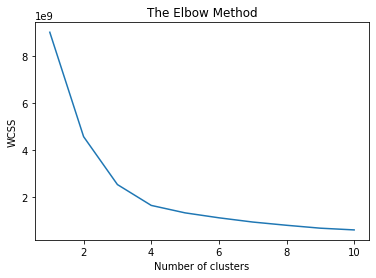

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

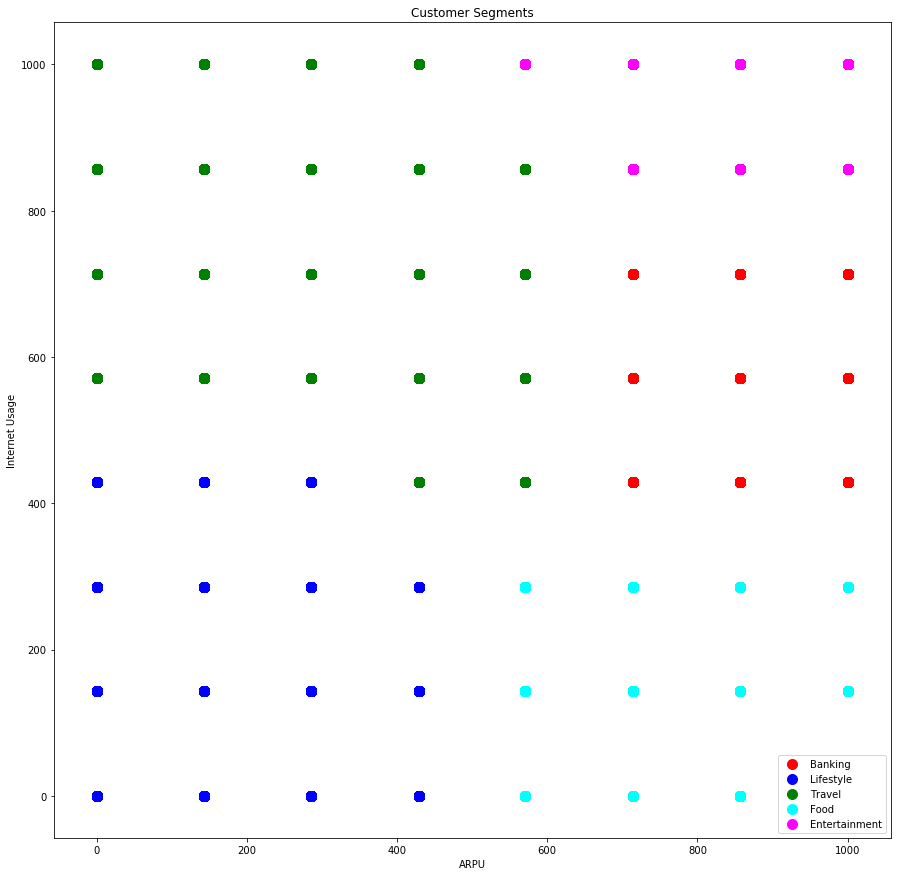

In [25]:
fig=plt.figure(figsize=(15, 15))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Banking')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Lifestyle')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Travel')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Food')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Entertainment')
plt.title('Customer Segments')
plt.xlabel('ARPU')
plt.ylabel('Internet Usage')
plt.legend()
plt.show()

In [24]:
y_kmeans

array([1, 0, 4, ..., 2, 1, 2])

In [27]:
ykm = {0 : 'Banking', 1 : 'Lifestyle', 2 : 'Travel', 3 : 'Food', 4 : 'Entertainment'}

In [28]:
segment = [ykm[letter] for letter in y_kmeans]

In [29]:
segment

['Lifestyle',
 'Banking',
 'Entertainment',
 'Travel',
 'Entertainment',
 'Lifestyle',
 'Entertainment',
 'Entertainment',
 'Travel',
 'Banking',
 'Banking',
 'Banking',
 'Travel',
 'Entertainment',
 'Travel',
 'Travel',
 'Entertainment',
 'Banking',
 'Travel',
 'Entertainment',
 'Entertainment',
 'Food',
 'Banking',
 'Travel',
 'Banking',
 'Travel',
 'Food',
 'Entertainment',
 'Food',
 'Entertainment',
 'Banking',
 'Entertainment',
 'Entertainment',
 'Travel',
 'Entertainment',
 'Entertainment',
 'Travel',
 'Banking',
 'Travel',
 'Banking',
 'Lifestyle',
 'Entertainment',
 'Travel',
 'Travel',
 'Entertainment',
 'Travel',
 'Banking',
 'Travel',
 'Lifestyle',
 'Entertainment',
 'Travel',
 'Food',
 'Banking',
 'Entertainment',
 'Entertainment',
 'Lifestyle',
 'Banking',
 'Food',
 'Banking',
 'Banking',
 'Banking',
 'Entertainment',
 'Food',
 'Entertainment',
 'Banking',
 'Banking',
 'Entertainment',
 'Entertainment',
 'Entertainment',
 'Entertainment',
 'Lifestyle',
 'Entertainment',
 '

In [30]:
data['Customer Segment'] = segment

In [31]:
data

,Internet Usage,SMS Usage,Voice Usage,ARPU,Recharge,Age,Location,Gender,Churn,Customer Segment
0,143,143,125,143,125,>58,Kolkata,M,85,Lifestyle
1,857,143,375,429,375,39-43,Kolkata,F,76,Banking
2,714,143,1000,857,750,39-43,Kerala,M,22,Entertainment
3,429,0,375,1000,1000,39-43,Kerala,M,71,Travel
4,857,143,1000,1000,1000,>58,Kerala,M,35,Entertainment
...,...,...,...,...,...,...,...,...,...,...
48237,143,143,250,143,125,>58,Kolkata,F,80,Lifestyle
48238,1000,143,625,429,375,39-43,Kolkata,M,55,Banking
48239,286,143,375,571,500,29-33,Kolkata,M,63,Travel
48240,286,143,375,143,125,49-53,Kolkata,M,89,Lifestyle
